# Pymaceuticals Inc.
---

### Analysis

- Mouse weight and tumor volume appear to be related as seen in the correlation graph.
- Capomulin and Ramicane are the most effective, as seen in the graphs and the mean values.
- Ketapril is the least effective, having the largest average tumor volume, while also having high variance.
- During the first 20 days of Capomulin for mouse 1509, the tumor volume is steadily increasing, but there is a 20% decrease by day 35. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data.head()) 

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(num_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
print(duplicate_mouse_ids)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data["Mouse ID"] == "g989"]
display(duplicate_mouse_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = "g989"
clean_df = merged_data[merged_data["Mouse ID"] != duplicate_mouse_id]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_df["Mouse ID"].nunique()
print(num_mice_clean)

248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Display the resulting summary statistics DataFrame
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    **{'Mean Tumor Volume': 'mean',     # Mean of tumor volume with custom column name
       'Median Tumor Volume': 'median',  # Median of tumor volume
       'Tumor Volume Variance': 'var',   # Variance of tumor volume
       'Tumor Volume Std. Dev.': 'std',      # Standard deviation of tumor volume
       'Tumor Volume Std. Err.': 'sem'}        # Standard error of the mean (SEM)
)
# Assemble the resulting series into a single summary DataFrame.
display(summary_stats)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group by 'Drug Regimen' and calculate the summary statistics for tumor volume
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',     # Mean of tumor volume with custom column name
    median='median',              # Median of tumor volume
    var='var',               # Variance of tumor volume
    std='std',                # Standard deviation of tumor volume
    sem='sem'                     # Standard error of the mean (SEM)
)
summary_stats.columns.name = "Tumor Volume (mm3)"

# Display the resulting summary statistics
display(summary_stats)


Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

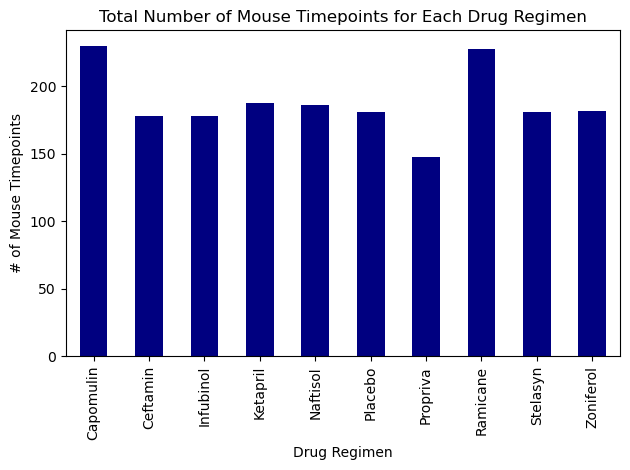

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_count_per_regimen = clean_df.groupby('Drug Regimen').size()
row_count_per_regimen.plot(kind='bar', color='Navy')

plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mouse Timepoints')

plt.tight_layout()
plt.show()

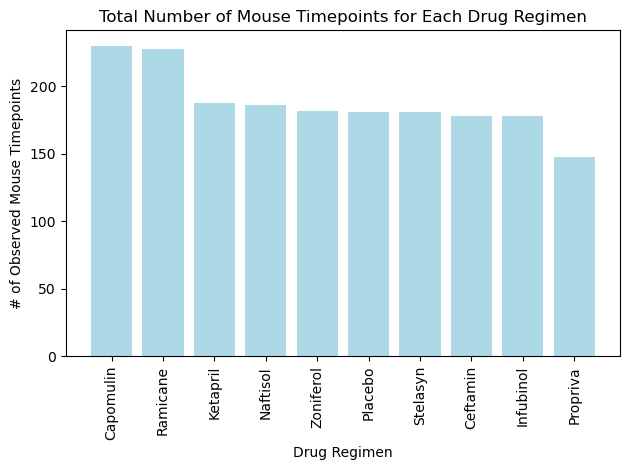

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_count_per_regimen = clean_df.groupby('Drug Regimen').size()

row_count_per_regimen = row_count_per_regimen.sort_values(ascending=False)


plt.bar(row_count_per_regimen.index, row_count_per_regimen.values, color='lightblue')

plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

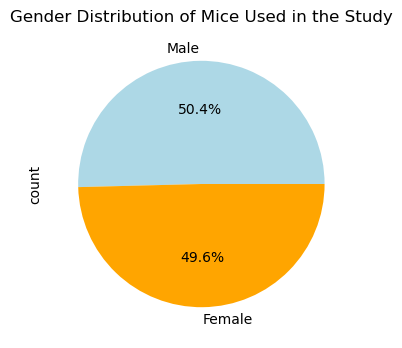

In [30]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
# Get the unique mice with their gender
gender_counts = unique_mice_gender['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4), colors=['lightblue', 'orange'])
# Make the pie chart
plt.title('Gender Distribution of Mice Used in the Study')

plt.ylabel('count')
plt.show()

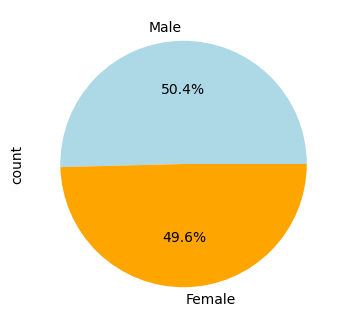

In [34]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
# Get the unique mice with their gender
gender_counts = unique_mice_gender['Sex'].value_counts()
# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])

plt.ylabel('count')

plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_data = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'])
final_tumor_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
display(final_tumor_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
3,a275,Ceftamin,62.999356,45
6,a411,Ramicane,38.407618,45
7,a444,Ramicane,43.047543,45
...,...,...,...,...
238,y769,Ceftamin,68.594745,45
239,y793,Capomulin,31.896238,45
240,y865,Ceftamin,64.729837,45
244,z578,Ramicane,30.638696,45


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]

  # Add subset
    tumor_volumes.append(treatment_data['Tumor Volume (mm3)'])

    # Calculate the IQR for the tumor volumes of this regimen
    Q1 = treatment_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_data = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
# Determine outliers using upper and lower bounds
    print(f"{treatment}'s potential outliers: {outlier_data['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


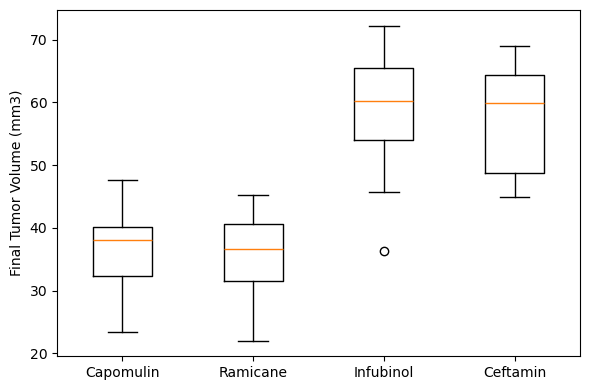

In [61]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
grouped_data = [final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
                for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]

plt.boxplot(grouped_data, tick_labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

for flier in box['fliers']:
    flier.set(marker ='o',
              color ='red',
              alpha = 0.5)

plt.ylabel('Final Tumor Volume (mm3)')  # Label for the y-axis

plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

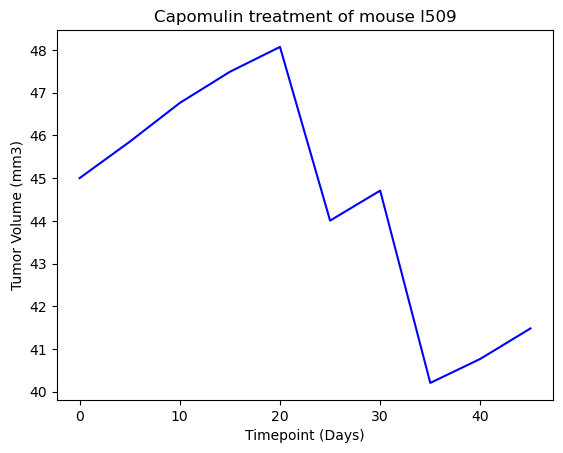

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == mouse_id)]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-', label=f'Mouse {mouse_id}')

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


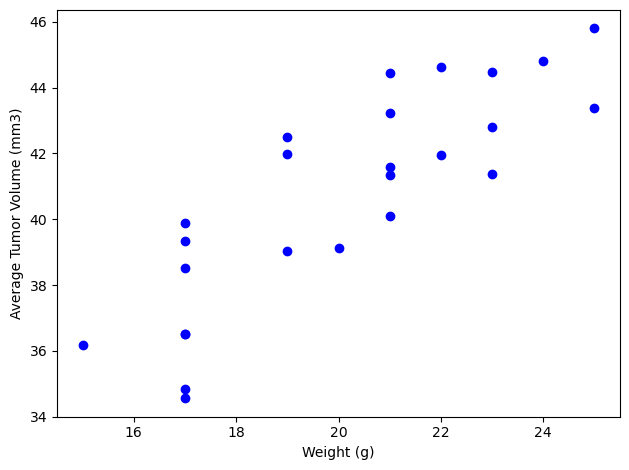

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
scatter_data = pd.DataFrame({'Weight (g)': mouse_weight, 'Average Tumor Volume (mm3)': avg_tumor_volume})

plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], color='b')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


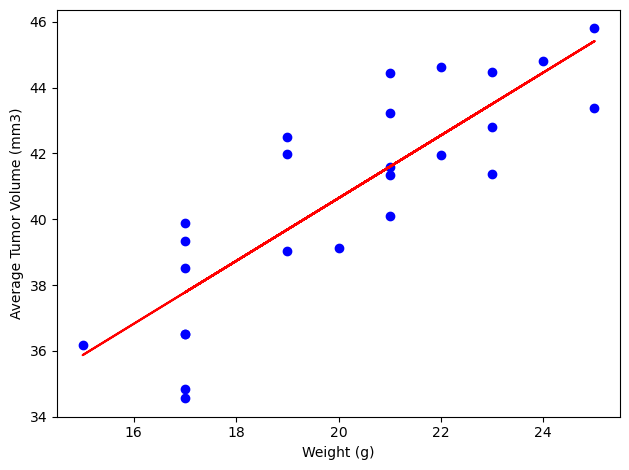

In [77]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
scatter_data = pd.DataFrame({'Weight (g)': mouse_weight, 'Average Tumor Volume (mm3)': avg_tumor_volume})
correlation = st.pearsonr(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x = scatter_data['Weight (g)']
y = scatter_data['Average Tumor Volume (mm3)']

slope, intercept, _, _, _ = st.linregress(x, y)
regression_line = slope * x + intercept

plt.scatter(x, y, color='b', label='Data points')  # Scatter plot
plt.plot(x, regression_line, color='r', label='Linear regression line') 

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()